## Introduction

In this project, I delved into the Amazon Fine Food Reviews dataset, applying Natural Language Processing (NLP) and Exploratory Data Analysis (EDA) to decode the sentiments embedded in customer reviews. It began with rigorous data cleaning, followed by sentiment analysis using NLTK's Sentiment Intensity Analyzer, which enabled me to categorize reviews into positive, neutral, or negative sentiments. I further enriched my analysis by creating visualizations like histograms, bar plots, and word clouds, which provided deeper insights into the distribution of review scores and prevalent themes in customer feedback. This comprehensive approach offered a multi-faceted understanding of customer perspectives, invaluable for businesses looking to glean insights from consumer sentiments on Amazon's fine food products.


## Data Preview

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [19]:
df = pd.read_csv('Reviews.csv')
print(df.shape)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Data Cleaning

In [22]:
# check if there are any missing values
print(df.isnull().sum())
# we don't have a lot of missing values, so we can just delete rows that have missing values
df= df.dropna()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

## EDA

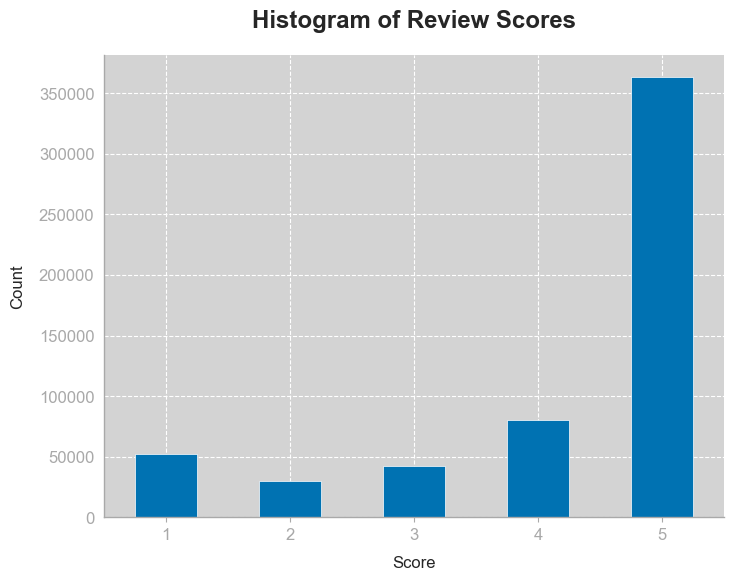

In [28]:
plt.figure(figsize=(8, 6))
df['Score'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Histogram of Review Scores')
plt.xticks(rotation=0)
plt.style.use('/Users/monicazhang/.matplotlib/stylelib/my_style.mplstyle') 
plt.show()

Histogram of Review Scores: This visualization helps in understanding the distribution of scores.

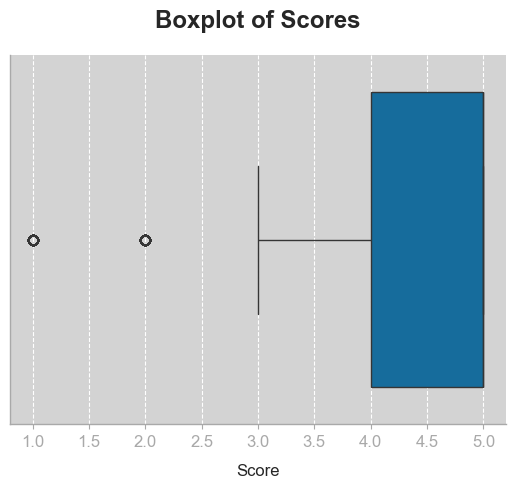

In [30]:
# Boxplot for Score
sns.boxplot(x='Score', data=df)
plt.title('Boxplot of Scores')
plt.show()

Boxplot of Scores: This boxplot shows the distribution of review scores. It gives an idea of the median score, the interquartile range, and potential outliers in the scores.

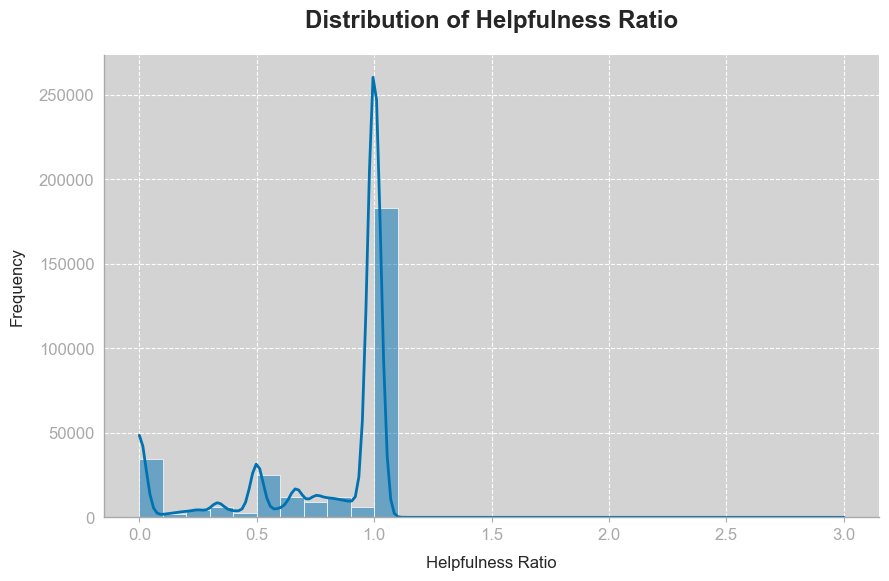

In [32]:
# Helpfulness Ratio (only for rows where HelpfulnessDenominator is not zero)
df['HelpfulnessRatio'] = df.apply(lambda row: row['HelpfulnessNumerator'] / row['HelpfulnessDenominator'] if row['HelpfulnessDenominator'] != 0 else None, axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(df['HelpfulnessRatio'].dropna(), bins=30, kde=True)
plt.title('Distribution of Helpfulness Ratio')
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Frequency')
plt.show()

Distribution of Helpfulness Ratio: The histogram of Helpfulness Ratio (calculated as Helpfulness Numerator divided by Helpfulness Denominator) indicates the proportion of helpful votes in all votes. It's only calculated for cases where the denominator is not zero to avoid division by zero.

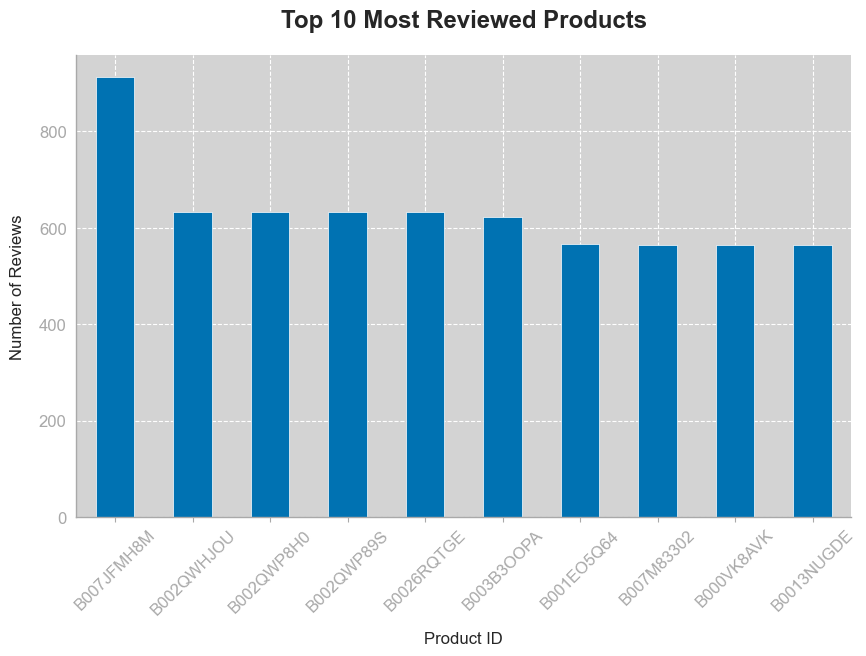

In [33]:
# Top 10 Most Reviewed Products
top_products = df['ProductId'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

Top 10 Most Reviewed Products: This bar chart displays the top 10 products with the most reviews. It helps identify the most popular or frequently reviewed products in the dataset.

## Sentiment Analysis

In [41]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get the compound score of sentiments
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis to the 'Text' column
df['Sentiment'] = df['Text'].apply(get_sentiment)

# Display the first few rows of the dataframe
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/monicazhang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,NaN,0.9468


In [43]:
# Define a function to categorize sentiment based on the compound score

def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create a new 'Sentiment_Label' column
df['Sentiment_Label'] = df['Sentiment'].apply(categorize_sentiment)
df.head

<bound method NDFrame.head of             Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNu

## Visualization

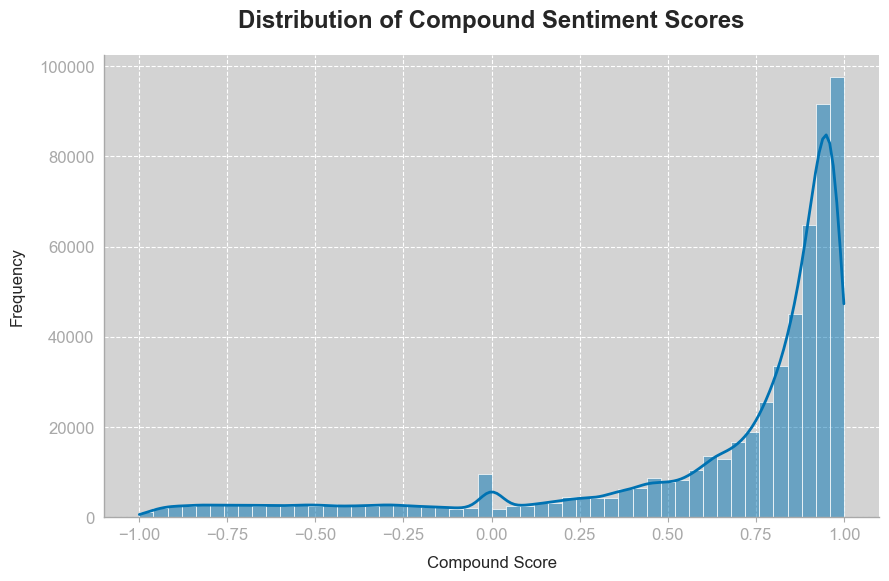

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=50, kde=True)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()


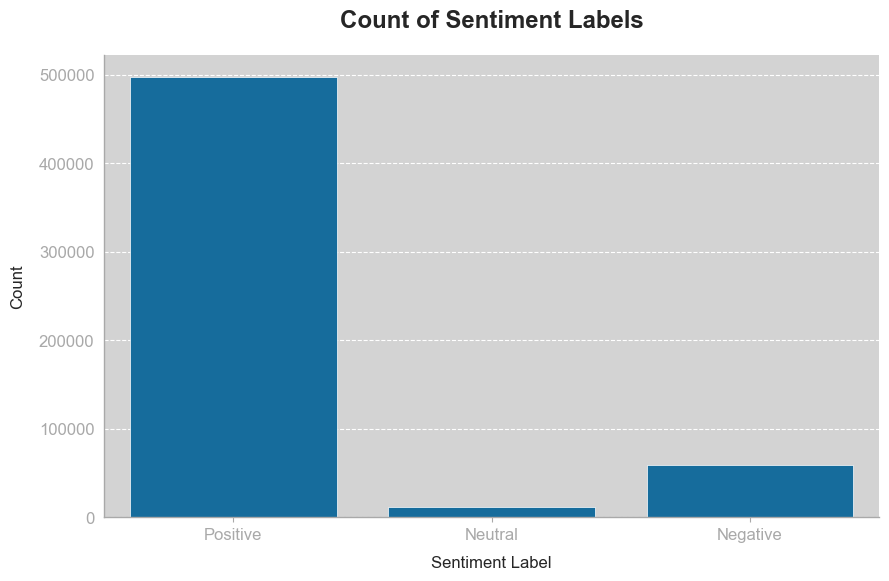

In [48]:
# Count plot for sentiment labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment_Label', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Count of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

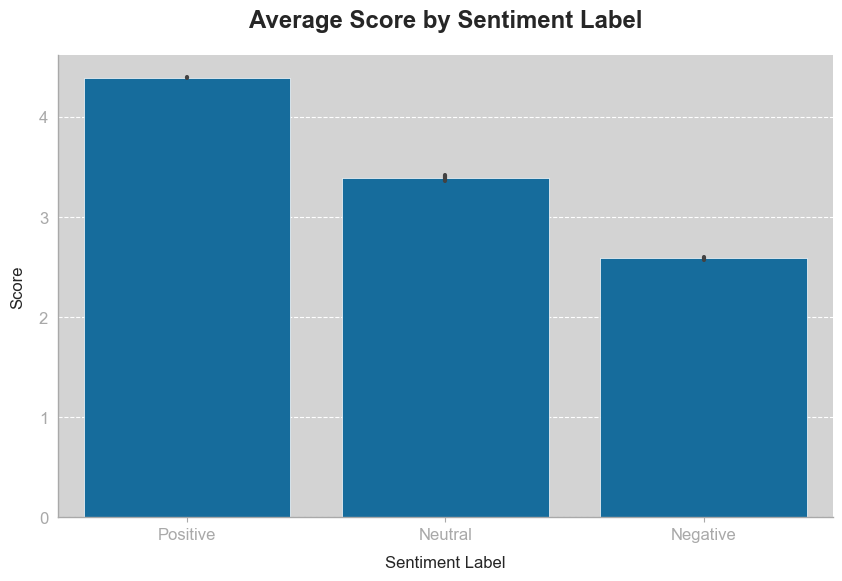

In [50]:
# create a bar plot showing the average score for each sentiment label
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment_Label', y='Score', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Average Score by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Score')
plt.show()

## WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/monicazhang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/monicazhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Exception ignored in: <function tqdm.__del__ at 0x16c3de050>
Traceback (most recent call last):
  File "/Users/monicazhang/anaconda3/lib/python3.10/site-packages/tqdm/std.py", line 1162, in __del__
    self.close()
  File "/Users/monicazhang/anaconda3/lib/python3.10/site-packages/tqdm/notebook.py", line 288, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x16c3de050>
Traceback (most recent call last):
  File "/Users/monicazhang/anaconda3/lib/python3.10/site-packages/tqdm/std.py", line 1162, in __del__
    self.close()
  File "/Users/monicazhang/anaconda3/lib/python3.10/site-packa

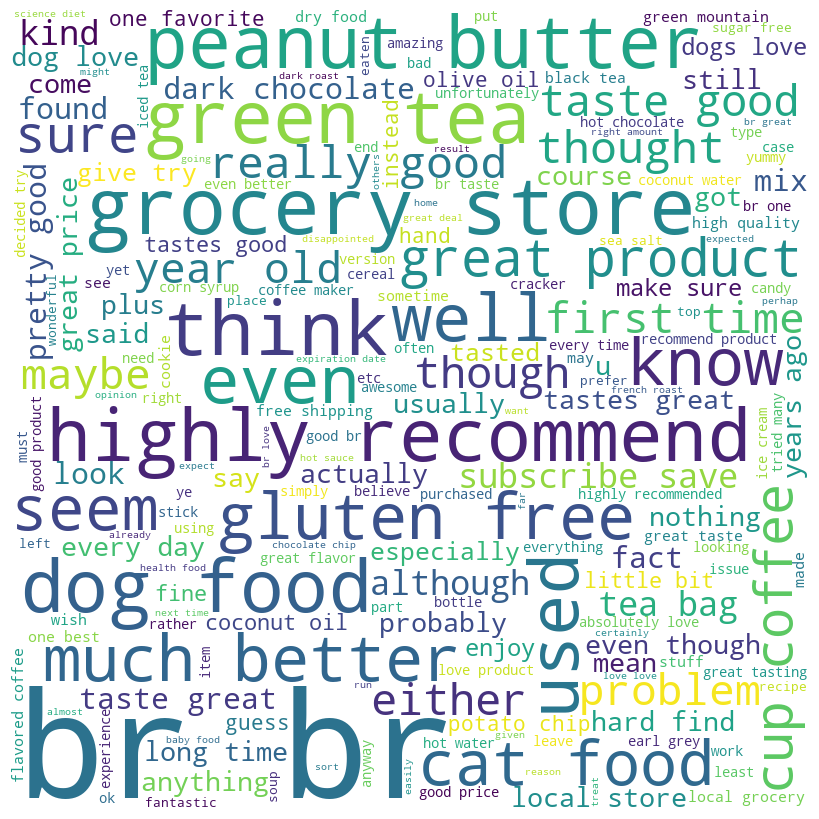

In [51]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Set of English stop words
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize text
def clean_tokenize(text):
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords and non-alphabetic words
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return words

# Apply the function to the 'Text' column
df['Cleaned_Text'] = df['Text'].apply(clean_tokenize)

# Join the words back into a single string for each row - needed for word cloud
text_for_wordcloud = ' '.join([' '.join(words) for words in df['Cleaned_Text']])

# Create and display a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text_for_wordcloud)

plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0)
plt.show()

## Conclusion

This project effectively harnessed Natural Language Processing (NLP) and Exploratory Data Analysis (EDA) to delve into the Amazon Fine Food Reviews dataset, providing an insightful glimpse into customer sentiments. The rigorous data cleaning and preprocessing laid the groundwork for a nuanced sentiment analysis using NLTK's Sentiment Intensity Analyzer, categorizing reviews into positive, neutral, and negative sentiments. The subsequent exploratory visualizations—histograms, bar plots, and word clouds—offered a vivid depiction of review score distributions and prominent feedback themes. This comprehensive approach not only highlighted key customer opinions but also emphasized the value of such analysis for businesses in the e-commerce sector. The project's findings are instrumental in guiding product and service strategies to align closely with customer expectations, showcasing the power of data-driven insights in shaping consumer-centric decision-making.